## Example of Multioutput Regression & Regressor Chains

*@XavierTorres*

In this example we are trying to predict 2 continuous variables with 4 input features. Here we are not doing data cleaning, neither EDA, feature engineering nor fine-tuning model features. It's only a preliminary model overview.

- Inputs: 
    - Land_sqf
    - Gross_sqf
    - Year_built
    - NBH_level	(Neighborhood level: 10= most upper class; 1: most lower class)
    
- Outputs: 
    - SALE_PRICE 	
    - YEARLY_RENT

We are going to try different approaches to predict each output (possible SALE_PRICE and possible YEARLY_RENT for a new property). The approaches are: 

1. Use the **multioutput regression**. Doesn't take into account possible relationship between outputs. Precits outputs individually. Learner: `GradientBoostingRegressorGradientBoostingRegressor`.
1. Use the **multioutput regression**. Doesn't take into account possible relationship between outputs. Precits outputs individually. Learner: `LinearRegression`.
1. Use the **regression chain** in order to exploit correlations among targets. Learner: `LinearRegression`.

> **Regressor Chain**: a way of combining a number of regressions into a single multi-target model that is capable of exploiting correlations among targets.

> Some more info regarding to this in scikit library https://scikit-learn.org/stable/modules/multiclass.html:
>- 1.12.5 Multioutput regression: fits one regressor per target but does not take into account correlations among targets.
>- 1.12.8. Regressor Chain: a way of combining a number of regressions into a single multi-target model that is capable of exploiting correlations among targets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('nyc-rolling-sales-clean-1.csv', sep=';')

In [3]:
df.head()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
0,2400,1552,1930,2,220485,10900
1,2742,1207,1925,2,223372,8100
2,5610,1320,1910,5,362981,19000
3,1758,1537,1910,5,245135,9700
4,1317,1339,1920,4,216477,12800


In [4]:
df.corr()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
Land_sqf,1.000000,0.383712,-0.001142,0.030384,0.693293,0.534428
Gross_sqf,0.383712,1.000000,-0.061774,-0.025912,0.782791,0.536878
Year_built,-0.001142,-0.061774,1.000000,0.030740,-0.004287,0.053032
NBH_level,0.030384,-0.025912,0.030740,1.000000,0.426108,0.682104
SALE_PRICE,0.693293,0.782791,-0.004287,0.426108,1.000000,0.864152
YEARLY_RENT,0.534428,0.536878,0.053032,0.682104,0.864152,1.000000


In [5]:
df.describe()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,2645.676976,1639.773196,1938.378007,5.374570,287247.257732,18346.735395
std,1353.765596,810.233323,27.953929,2.892423,105082.283757,9435.111314
min,353.000000,450.000000,1901.000000,1.000000,78522.000000,4300.000000
25%,1900.000000,1114.000000,1920.000000,3.000000,216482.500000,10750.000000
50%,2446.000000,1400.000000,1930.000000,5.000000,281208.000000,17300.000000
75%,3000.000000,1960.000000,1950.000000,8.000000,332174.500000,24550.000000
max,14384.000000,5303.000000,2015.000000,10.000000,961748.000000,81400.000000


In [6]:
df.dtypes

Land_sqf       int64
Gross_sqf      int64
Year_built     int64
NBH_level      int64
SALE_PRICE     int64
YEARLY_RENT    int64
dtype: object

In [7]:
# Assigning first 4 columns to X, our dataset with the 4 independent variables or 'features'
X = df.iloc[:,:4] 

In [8]:
X.head()

,Land_sqf,Gross_sqf,Year_built,NBH_level
0,2400,1552,1930,2
1,2742,1207,1925,2
2,5610,1320,1910,5
3,1758,1537,1910,5
4,1317,1339,1920,4


In [9]:
X.shape

(291, 4)

In [10]:
# Assigning last 4 columns to Y, with the 2 dependant variables or 'outputs' or 'targets'
Y = df.iloc[:,4:]

In [11]:
Y.head()

,SALE_PRICE,YEARLY_RENT
0,220485,10900
1,223372,8100
2,362981,19000
3,245135,9700
4,216477,12800


In [12]:
Y.shape

(291, 2)

In [13]:
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=0)

## Option 1:  Multioutput regression. More info [here](https://scikit-learn.org/stable/modules/multiclass.html#multioutput-regression): 
#### Fits one regressor per target but does not take into account correlations among targets.

In [14]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import RegressorChain

### 1.1 Using  GradientBoostingRegressor

In [15]:
base_regr1 = GradientBoostingRegressor()  # this is the base regressor... we could later try with other types like RF,  linear, logistic, etc.
# see also --> https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_regression_multioutput.html#sphx-glr-auto-examples-ensemble-plot-random-forest-regression-multioutput-py
# Question: Do we need to normalize features before applying  GradientBoostingRegressor()???

multi_output_regr = MultiOutputRegressor(base_regr1, n_jobs=-1)
multi_output_regr.fit(X_train, Y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_est

In [16]:
Y_pred_mor_gbr = multi_output_regr.predict(X_test) # 'mor' stands for MultiOutputRegressor and 'gbr' stand for  GradientBoostingRegressor
score_mor = multi_output_regr.score(X_test, Y_test)
print("MultiOutputRegressor score =", score_mor)

MultiOutputRegressor score = 0.8861270549042206


In [17]:
Y_pred_mor_gbr[:5]  #first 5 vectors of our predictions

array([[264506.85705085,  18218.79528001],
       [339412.37220211,  18046.27183158],
       [189783.22368717,   7658.35142692],
       [255874.33393749,  20717.3343184 ],
       [173536.57909594,   7980.07347728]])

In [18]:
mse1 = mean_squared_error(Y_test.iloc[:,0],Y_pred_mor_gbr[:,[0]])
r2_score1 = r2_score(Y_test.iloc[:,0],Y_pred_mor_gbr[:,[0]])

print("Mean squared error Y1=", mse1, " --- R2 for Y1=",  r2_score1)

Mean squared error Y1= 841047081.2476592  --- R2 for Y1= 0.9190958942883389


In [19]:
mse2 = mean_squared_error(Y_test.iloc[:,1],Y_pred_mor_gbr[:,[1]])
r2_score2 = r2_score(Y_test.iloc[:,1],Y_pred_mor_gbr[:,[1]])

print("Mean squared error Y2=", mse2, " --- R2 for Y2=",  r2_score2)


Mean squared error Y2= 13366905.815225935  --- R2 for Y2= 0.8531582155201022


In [20]:
multi_output_regr.estimators_

[GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_sam

### 1.2 Trying with linear regression

In [21]:
base_regr2 = linear_model.LinearRegression(normalize=True)  
multi_output_regr = MultiOutputRegressor(base_regr2, n_jobs=-1)
multi_output_regr.fit(X_train, Y_train)

MultiOutputRegressor(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=True),
                     n_jobs=-1)

In [22]:
Y_pred_mor_lnr = multi_output_regr.predict(X_test) # 'mor' stands for MultiOutputRegressor
score_mor = multi_output_regr.score(X_test, Y_test)
print("MultiOutputRegressor score =", score_mor)

MultiOutputRegressor score = 0.9324803590333748


In [23]:
# Printing coefficients ans interception for estimator 1
print("Coefficients: ", multi_output_regr.estimators_[0].coef_)
print("Intercept: ", multi_output_regr.estimators_[0].intercept_)

Coefficients:  [   33.86123835    82.57564302   122.93659312 15351.64651242]
Intercept:  -256756.70324842847


In [24]:
# Printing coefficients ans interception for estimator 2
print("Coefficients: ", multi_output_regr.estimators_[1].coef_)
print("Intercept: ", multi_output_regr.estimators_[1].intercept_)

Coefficients:  [   2.51431302    4.90399986   24.01429436 2206.56466953]
Intercept:  -54854.11316898424


In [25]:
Y_test.head()

,SALE_PRICE,YEARLY_RENT
226,260934,14600
283,293357,13000
209,196531,7700
171,256415,21600
118,143049,5900


In [26]:
#Checking  mean_squared_error and r2_score for output Y1

mse1 = mean_squared_error(Y_test.iloc[:,0],Y_pred_mor_lnr[:,[0]])
r2_score1 = r2_score(Y_test.iloc[:,0],Y_pred_mor_lnr[:,[0]])

print("Mean squared error Y1=", mse1, " --- R2 for Y1=",  r2_score1)

Mean squared error Y1= 308579730.1393211  --- R2 for Y1= 0.9703163263219077


In [27]:
#Checking  mean_squared_error and r2_score for output Y2

mse2 = mean_squared_error(Y_test.iloc[:,1],Y_pred_mor_lnr[:,[1]])
r2_score2 = r2_score(Y_test.iloc[:,1],Y_pred_mor_lnr[:,[1]])

print("Mean squared error Y2=", mse2, " --- R2 for Y2=",  r2_score2)


Mean squared error Y2= 9590447.961665342  --- R2 for Y2= 0.8946443917448419


## Option 2:  Regressor Chain. More info [here](https://scikit-learn.org/stable/modules/multiclass.html#regressor-chain): 
#### A way of combining a number of regressions into a single multi-target model that is capable of exploiting correlations among targets.

In [28]:
Y.corr()

,SALE_PRICE,YEARLY_RENT
SALE_PRICE,1.000000,0.864152
YEARLY_RENT,0.864152,1.000000


In [29]:
base_lr = linear_model.LinearRegression(normalize=True)  

In [30]:
chains = [RegressorChain(base_lr, order='random', random_state=i)  
          for i in range(2)]           #CLASSIFIER: Creates 2 classifiers, 2 chains in this case, with random order of Y dependants, and stores chains in arrays
for chain in chains:
    chain.fit(X_train, Y_train)         #FIT: fits for every chain

Y_pred_chains = np.array([chain.predict(X_test) for chain in
                          chains])      # PREDICT: Predicts X_test for every chain         



In [31]:
chain_scores = [chain.score(X_test, Y_test)
                        for chain in chains]  

In [32]:
chain_scores

[0.9696594555003062, 0.9696594555003062]

**...both chains  have  the same score**, so the order of output prediction is not important in this case

In [33]:
Y_pred_chains[:2,:2]

array([[[241878.16664675,  18712.47818918],
        [294905.36941289,  16223.56116792]],

       [[241878.16664675,  18712.47818918],
        [294905.36941289,  16223.56116792]]])

----------------------------------------------

#### BELOW: *(the same as above but generating chains manually instead of using a `for` loop)*

In [34]:
base_lr = linear_model.LinearRegression(normalize=True)  

In [35]:
#chain 1 order [0,1] - first performs regression on sale price, then on rent

chain1 = RegressorChain(base_lr, order=[0,1]) 
chain1.fit(X_train, Y_train)
Y_pred_chain1 = chain1.predict(X_test)

mse1 = mean_squared_error(Y_test.iloc[:,0],Y_pred_chain1[:,[0]])
r2_score1 = r2_score(Y_test.iloc[:,0],Y_pred_chain1[:,[0]])
print("Mean squared error Y1=", mse1, " --- R2 for Y1=",  r2_score1)

mse2 = mean_squared_error(Y_test.iloc[:,1],Y_pred_chain1[:,[1]])
r2_score2 = r2_score(Y_test.iloc[:,1],Y_pred_chain1[:,[1]])

print("Mean squared error Y2=", mse2, " --- R2 for Y2=",  r2_score2)


Mean squared error Y1= 308579730.1393215  --- R2 for Y1= 0.9703163263219077
Mean squared error Y2= 9590447.961665332  --- R2 for Y2= 0.894644391744842


In [36]:
Y_pred_chain1[:5]

array([[241878.16664675,  18712.47818918],
       [294905.36941289,  16223.56116792],
       [183879.07192249,   6061.44485257],
       [269999.29715005,  19325.20076373],
       [173542.06018593,   7726.00788735]])

In [37]:
# Printing coefficients ans interception for estimator 1 : SALES PRICE

print("Coefficients: ", chain1.estimators_[0].coef_)
print("Intercept: ", chain1.estimators_[0].intercept_)

Coefficients:  [   33.86123835    82.57564302   122.93659312 15351.64651242]
Intercept:  -256756.7032484301


In [38]:
# Printing coefficients ans interception for estimator 2 : YEARLY RENT

print("Coefficients: ", chain1.estimators_[1].coef_)
print("Intercept: ", chain1.estimators_[1].intercept_)

Coefficients:  [ 2.73120637e+00  5.43292640e+00  2.48017472e+01  2.30489746e+03
 -6.40535787e-03]
Intercept:  -56498.73173941924


In [39]:
#chain 2 order [1,0] - first perfoms regression on rent price, then on sale price

chain2 = RegressorChain(base_lr, order=[1,0]) 
chain2.fit(X_train, Y_train)
Y_pred_chain2 = chain2.predict(X_test)

mse1 = mean_squared_error(Y_test.iloc[:,0],Y_pred_chain2[:,[0]])
r2_score1 = r2_score(Y_test.iloc[:,0],Y_pred_chain2[:,[0]])
print("Mean squared error Y1=", mse1, " --- R2 for Y1=",  r2_score1)

mse2 = mean_squared_error(Y_test.iloc[:,1],Y_pred_chain2[:,[1]])
r2_score2 = r2_score(Y_test.iloc[:,1],Y_pred_chain2[:,[1]])

print("Mean squared error Y2=", mse2, " --- R2 for Y2=",  r2_score2)

Mean squared error Y1= 308579730.1393219  --- R2 for Y1= 0.9703163263219077
Mean squared error Y2= 9590447.961665345  --- R2 for Y2= 0.8946443917448419


In [40]:
# Printing coefficients ans interception for estimator 1 : YEARLY RENT
print("Coefficients: ", chain2.estimators_[0].coef_)
print("Intercept: ", chain2.estimators_[0].intercept_)

Coefficients:  [   2.51431302    4.90399986   24.01429436 2206.56466953]
Intercept:  -54854.11316898441


In [41]:
# Printing coefficients ans interception for estimator 2 : SALES PRICE
print("Coefficients: ", chain2.estimators_[1].coef_)
print("Intercept: ", chain2.estimators_[1].intercept_)

Coefficients:  [ 3.41955018e+01  8.32276015e+01  1.26129155e+02  1.56449965e+04
 -1.32944228e-01]
Intercept:  -264049.24099248595


In [ ]:
'''
#chain 3 order random 

chain3 = RegressorChain(base_lr, order='random') 
chain3.fit(X_train, Y_train)
Y_pred_chain3 = chain3.predict(X_test)

mse1 = mean_squared_error(Y_test.iloc[:,0],Y_pred_chain2[:,[0]])
r2_score1 = r2_score(Y_test.iloc[:,0],Y_pred_chain2[:,[0]])
print("Mean squared error Y1=", mse1, " --- R2 for Y1=",  r2_score1)

mse2 = mean_squared_error(Y_test.iloc[:,1],Y_pred_chain2[:,[1]])
r2_score2 = r2_score(Y_test.iloc[:,1],Y_pred_chain2[:,[1]])

print("Mean squarederror Y2=", mse2, " --- R2 for Y2=",  r2_score2)
'''

------------


# Let's create some lineplots to visually see how predictions perform:

**Chart for predictions of Y1 (SALE PRICE):**


- **Y_pred_mor_gbr** = Predictions using MultipleOutputRegression with learner`GradientBoostingRegressor()`
- **Y_pred_mor_lnr** = Predictions using MultipleOutputRegression with learner `LinearRegression`
- **Y_pred_chain1** = Predictions using RegressorChain with learner `LinearRegression`

In [42]:
# Creating dataframe of 4 columns of the first output Y1: 1) Y_test, 2) Y_pred_mor_gbr, 3) Y_pred_mor_lnr, 4) Y_pred_chain1 
# (we use chain 1 as there is no substantial difference between chain1 and chain2)

df_Y1 = pd.DataFrame({'Y_test':Y_test['SALE_PRICE']})
df_Y1['Y_pred_mor_gbr'] = pd.DataFrame(Y_pred_mor_gbr[:,[0]]).values
df_Y1['Y_pred_mor_lnr'] = pd.DataFrame(Y_pred_mor_lnr[:,[0]]).values
df_Y1['Y_pred_chain1'] = pd.DataFrame(Y_pred_chain1[:,[0]]).values

In [43]:
df_Y1.shape

(88, 4)

In [44]:
df_Y1.head(5)

,Y_test,Y_pred_mor_gbr,Y_pred_mor_lnr,Y_pred_chain1
226,260934,264506.857051,241878.166647,241878.166647
283,293357,339412.372202,294905.369413,294905.369413
209,196531,189783.223687,183879.071922,183879.071922
171,256415,255874.333937,269999.297150,269999.297150
118,143049,173536.579096,173542.060186,173542.060186


In [45]:
df_Y1.sort_values(by='Y_test', ascending=True, inplace=True) #Sorting the dataset to better visualize results in a plot

In [46]:
df_Y1.reset_index(inplace=True, drop=True) #Resetting index
df_Y1.index

RangeIndex(start=0, stop=88, step=1)

In [47]:
df_Y1.head()

,Y_test,Y_pred_mor_gbr,Y_pred_mor_lnr,Y_pred_chain1
0,78522,137979.238129,90555.520408,90555.520408
1,104414,157738.410939,131433.028004,131433.028004
2,109103,170321.240093,137550.744833,137550.744833
3,143049,173536.579096,173542.060186,173542.060186
4,153305,158787.100174,128965.941491,128965.941491


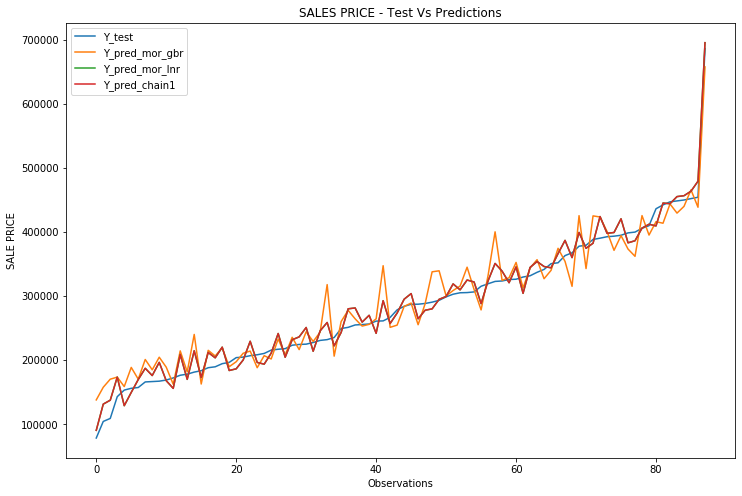

In [48]:
plt.figure(figsize=(12,8))
plt.plot(df_Y1.index, df_Y1.Y_test, label = "Y_test")
plt.plot(df_Y1.index, df_Y1.Y_pred_mor_gbr, label = "Y_pred_mor_gbr")
plt.plot(df_Y1.index, df_Y1.Y_pred_mor_lnr, label = "Y_pred_mor_lnr")
plt.plot(df_Y1.index, df_Y1.Y_pred_chain1, label = "Y_pred_chain1")
plt.xlabel('Observations')
plt.ylabel('SALE PRICE')
plt.title('SALES PRICE - Test Vs Predictions')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

**Chart for predictions of Y2 (YEARLY_RENT):**

In [49]:
Y_test.columns

Index(['SALE_PRICE', 'YEARLY_RENT'], dtype='object')

In [50]:
# Creating dataframe of 4 columns of the SECOND output Y1: 1) Y_test, 2) Y_pred_mor_gbr, 3) Y_pred_mor_lnr, 4) Y_pred_chain1 
# (we use chain 1 as there is no substantial difference between chain1 and chain2)
df_Y2 = pd.DataFrame({'Y_test':Y_test['YEARLY_RENT']})
df_Y2['Y_pred_mor_gbr']= pd.DataFrame(Y_pred_mor_gbr[:,[1]]).values
df_Y2['Y_pred_mor_lnr']= pd.DataFrame(Y_pred_mor_lnr[:,[1]]).values
df_Y2['Y_pred_chain1']= pd.DataFrame(Y_pred_chain1[:,[1]]).values

In [51]:
df_Y2.shape

(88, 4)

In [52]:
df_Y2.head(10)

,Y_test,Y_pred_mor_gbr,Y_pred_mor_lnr,Y_pred_chain1
226,14600,18218.795280,18712.478189,18712.478189
283,13000,18046.271832,16223.561168,16223.561168
209,7700,7658.351427,6061.444853,6061.444853
171,21600,20717.334318,19325.200764,19325.200764
118,5900,7980.073477,7726.007887,7726.007887
273,19100,17785.584188,14464.577917,14464.577917
73,19900,17145.154227,16661.631254,16661.631254
157,25000,22252.881572,24805.803824,24805.803824
129,17300,12381.552896,13704.355298,13704.355298
45,9900,12778.190750,10826.713692,10826.713692


In [53]:
df_Y2.sort_values(by='Y_test', ascending=True, inplace=True)

In [54]:
df_Y2.reset_index(inplace=True, drop=True)

In [55]:
df_Y2.head()

,Y_test,Y_pred_mor_gbr,Y_pred_mor_lnr,Y_pred_chain1
0,4600,5452.240290,3327.859163,3327.859163
1,5400,7679.392535,4883.338527,4883.338527
2,5700,8196.320459,6581.466708,6581.466708
3,5900,7980.073477,7726.007887,7726.007887
4,6000,8256.715151,2067.388993,2067.388993


In [56]:
df_Y2.index

RangeIndex(start=0, stop=88, step=1)

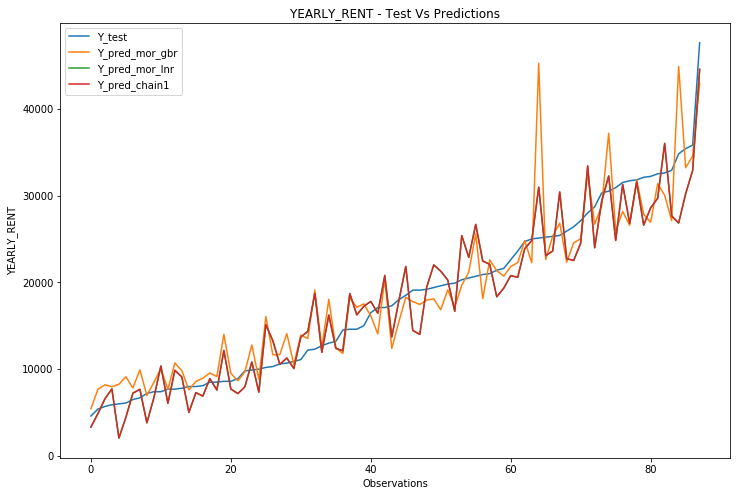

In [57]:
plt.figure(figsize=(12,8))
plt.plot(df_Y1.index, df_Y2.Y_test, label = "Y_test")
plt.plot(df_Y1.index, df_Y2.Y_pred_mor_gbr, label = "Y_pred_mor_gbr")
plt.plot(df_Y1.index, df_Y2.Y_pred_mor_lnr, label = "Y_pred_mor_lnr")
plt.plot(df_Y1.index, df_Y2.Y_pred_chain1, label = "Y_pred_chain1")
plt.xlabel('Observations')
plt.ylabel('YEARLY_RENT')
plt.title('YEARLY_RENT - Test Vs Predictions')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## MAIN CONLUSION: 
In this dataset, we note NO DIFFERENCES from predictions and coefficients using MultipleOutputRegression with learner `LinearRegression` and pedictions using RegressorChain with learner `LinearRegression`, except that the regressor chain model got a better `score` in overall, **0.969 compared to 0.932**.

`LinearRegression`, in this particular case, is better learner than `GradientBoostingRegressor`.

-----------------


--------------------

### *PERSONAL PRACTICE....Simple linear regression on 1 output at a time*


**Linear regression on first output Y1, SALE PRICE**

In [58]:
Y_train_1 = Y_train.iloc[:,0]
Y_test_1 = Y_test.iloc[:,0]
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, Y_train_1)
Y_pred_1 = regr.predict(X_test)

In [59]:
print('Coefficients: \n', regr.coef_)
print('Intercept or constant: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test_1, Y_pred_1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test_1, Y_pred_1))

Coefficients: 
 [   33.86123835    82.57564302   122.93659312 15351.64651242]
Intercept or constant: 
 -256756.7032484301
Mean squared error: 308579730.14
Coefficient of determination: 0.97


**Linear regression on second output Y2, YEARLY RENT**

In [60]:
Y_train_2 = Y_train.iloc[:,1]
Y_test_2 = Y_test.iloc[:,1]
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, Y_train_2)
Y_pred_2 = regr.predict(X_test)

In [61]:
print('Coefficients: \n', regr.coef_)
print('Intercept or constant: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test_2, Y_pred_2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test_2, Y_pred_2))

Coefficients: 
 [   2.51431302    4.90399986   24.01429436 2206.56466953]
Intercept or constant: 
 -54854.11316898441
Mean squared error: 9590447.96
Coefficient of determination: 0.89
